<a href="https://colab.research.google.com/github/Kaileycar/deep-learning-challenge/blob/main/Alphabet_Soup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN"])
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ["T9", "T13","T12", "T12", "T2", "T25", "T14", "T29", "T15", "T17"]

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification = application_df["CLASSIFICATION"].value_counts()
classification[classification > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_keep = ["C1000", "C2000", "C3000", "C1200", "C2100", "C7000", "C1700" "C4000", "C5000",
                           "C1270", "C2700"]
classifications_to_replace = list(set(application_df["CLASSIFICATION"]) - set(classifications_to_keep))

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1150
C7000      777
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [9]:
name = application_df["NAME"].value_counts()
name[name > 100]


PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCIATION

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
name_to_keep = list(name[name > 10].index)
name_to_replace = list(set(application_df["NAME"]) - set(name_to_keep))

# Replace in dataframe
for name in name_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                     21202
PARENT BOOSTER USA INC                                                     1260
TOPS CLUB INC                                                               765
UNITED STATES BOWLING CONGRESS INC                                          700
WASHINGTON STATE UNIVERSITY                                                 492
                                                                          ...  
AMERICAN POSTAL WORKERS UNION                                                11
SOCIETY FOR PRESERVATION & ENCOURMT OF BARBERSHOP QUARTET SINGING AMER       11
SIGMA ALPHA OMEGA CHRISTIAN SORORITY INC                                     11
FINANCIAL PLANNING ASSOCIATION                                               11
SLOW FOOD U S A INC                                                          11
Name: NAME, Length: 205, dtype: int64

In [11]:
# Check to see which columns are objects
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [12]:
# Create a list of all the categorical columns
application_cat = application_df[["NAME", "APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "USE_CASE",
                                         "ORGANIZATION", "SPECIAL_CONSIDERATIONS", "INCOME_AMT"]]

# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(application_df[["NAME", "APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "USE_CASE",
                                         "ORGANIZATION", "SPECIAL_CONSIDERATIONS", "INCOME_AMT"]])

# Merge the encoded data and drop the originals
application_df = application_df.merge(dummies, left_index=True, right_index=True)
application_df = application_df.drop(columns = application_cat)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,...,SPECIAL_CONSIDERATIONS_Y,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,108590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(columns="IS_SUCCESSFUL").values
y = application_df["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 252
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 20
# hidden_nodes_layer3 = 80

nn_5 = tf.keras.models.Sequential()

# First hidden layer
nn_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
                             input_dim=number_input_features,
                             activation="relu"))

# Second hidden layer
nn_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,
                             activation="relu"))

# # Second hidden layer
# nn_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,
#                              activation="relu"))

# Output layer
nn_5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                2530      
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2771 (10.82 KB)
Trainable params: 2771 (10.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compile the model
nn_5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Train the model
fit_model_5 = nn_5.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5178 - accuracy: 0.7451
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4523 - accuracy: 0.7820
Epoch 3/50
804/804 [==============================] - 2s 3ms/step - loss: 0.4426 - accuracy: 0.7839
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4409 - accuracy: 0.7854
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4387 - accuracy: 0.7860
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4379 - accuracy: 0.7867
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4369 - accuracy: 0.7879
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4366 - accuracy: 0.7871
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4357 - accuracy: 0.7885
Epoch 10/50
804/804 [==============================] - 3s 3ms/step - loss: 0.4353 - accuracy: 0.7883

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4594 - accuracy: 0.7784 - 807ms/epoch - 3ms/step
Loss: 0.459354966878891, Accuracy: 0.7784256339073181


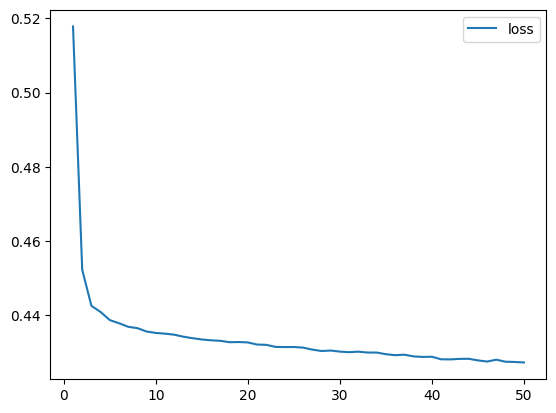

In [22]:
# Create a DataFrame containing training history
history_df_5 = pd.DataFrame(fit_model_5.history)

# Increase the index by 1 to match the number of epochs
history_df_5.index += 1

# Plot the loss
history_df_5.plot(y="loss")
plt.show()

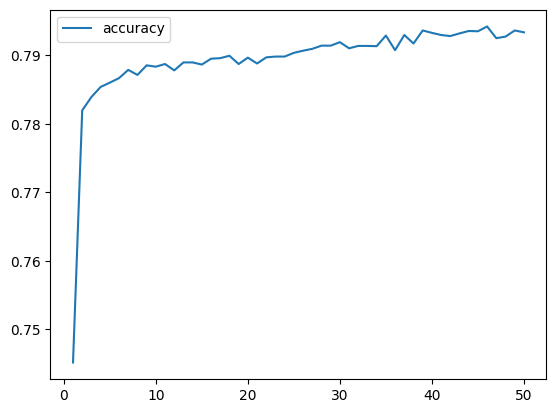

In [23]:
# Plot the accuracy
history_df_5.plot(y="accuracy")
plt.show()

In [24]:
# Export our model to HDF5 file
nn_5.save("AlphabetSoupCharity_Final.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
